In [1]:
#|default_exp app

In [4]:
#|export
!pip install -Uqq fastai
!pip install gradio
!pip install nbdev

# Dog or cat

In [11]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): 
    return x[0].isupper()

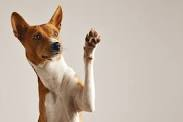

In [12]:
im = PILImage.create('/kaggle/input/dog-or-cat-test/dog.jpg')
im.thumbnail((192,192))
im

In [13]:
#|export
learn = load_learner('/kaggle/input/models/model.pkl')

In [14]:
learn.predict(im)

('False', tensor(0), tensor([0.9911, 0.0089]))

In [15]:
#|export
categories = ('Dog', 'Cat')
def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))


In [16]:
classify_image(im)

{'Dog': 0.99107426404953, 'Cat': 0.008925721980631351}

In [ ]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['/kaggle/input/dog-or-cat-test/dog.jpg','/kaggle/input/dog-or-cat-test/cat.jpg', '/kaggle/input/dog-or-cat-test/challenge.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

In [21]:
m = learn.model

In [22]:
ps = list(m.parameters())

In [23]:
ps[1]

Parameter containing:
tensor([ 2.3698e-01,  2.6464e-01, -5.1096e-08,  5.1736e-01,  3.4404e-09,
         2.2246e-01,  4.2287e-01,  1.3153e-07,  2.5117e-01,  1.5152e-06,
         3.1797e-01,  2.5037e-01,  3.7843e-01,  1.0862e-05,  2.7563e-01,
         2.3771e-01,  2.4135e-01,  3.9426e-01,  4.6984e-01,  2.9022e-01,
         2.7238e-01,  2.7887e-01,  2.9154e-01,  2.0574e-01,  2.6032e-01,
         2.7765e-01,  2.9126e-01,  3.1590e-01,  3.8782e-01,  3.0372e-01,
         2.6836e-01,  2.0942e-01,  2.8614e-01,  3.3151e-01,  4.2780e-01,
         3.7317e-01,  7.4804e-08,  1.8977e-01,  1.4740e-08,  2.2375e-01,
         1.7954e-01,  2.4913e-01,  2.7366e-01,  2.6011e-01,  2.9506e-01,
         3.0007e-01,  2.2407e-01,  2.6344e-01,  2.2001e-08,  2.6499e-01,
         2.2158e-01,  2.8276e-01,  3.2911e-01,  2.2805e-01,  3.6648e-01,
         2.1239e-01,  2.3830e-01,  2.5042e-01,  5.2609e-01,  2.4795e-01,
         2.9495e-01,  2.5872e-01,  4.8332e-01,  2.6686e-01],
       requires_grad=True)

# Export

In [26]:
from nbdev.export import nb_export

In [28]:
nb_export('dog_v_cat.ipynb', 'app')

FileNotFoundError: [Errno 2] No such file or directory: 'dog_v_cat.ipynb'